In [1]:
from astropy.io import fits
from astropy.table import Table
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
import astropy.units as u
from astropy.coordinates import SkyCoord
import numpy as np
import bz2, pdb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def SDSS_FITS_filename(RUN, CAMCOL, FIELD, FILTER):

	return "frame-{0}-{1:06d}-{2}-{3:04d}.fits.bz2".format(FILTER, RUN, CAMCOL, FIELD)

def open_fits(filename):

	hdulist = fits.open('../data/SDSSfields/{}'.format(filename))
	return hdulist[0].data, hdulist[0].header

def adjust_cutout_hdr(cutout, header):

	newhdr = cutout.wcs.to_header()
	# These params are necessary for pixel scale 
	for key in ['CD1_1', 'CD1_2', 'CD2_1', 'CD2_2']:
		newhdr[key] = header[key]
	return newhdr

def save_cutout(cutout, header, outfile, **kwargs):

	hdu = fits.PrimaryHDU(cutout.data, header=header)
	hdulist = fits.HDUList(hdu)
	hdulist.writeto("../data/cutouts/"+outfile, **kwargs)
    
def get_clim(img):

	mean = np.mean(img.ravel())
	std = np.std(img.ravel())
	low, high = mean-std/4., (mean+std)*2.5

	return (low, high)

In [3]:
gals = Table.read("../data/2017-01-30_final_clumpy_sample.csv")

In [4]:
# List of idx for gals that, by eye, have BAD cutouts
bad = [12,13,14,15,25,46,64,63,76,75,92,93,101,3]

coords = Table(data=(np.zeros(len(bad)), np.zeros(len(bad))), names=('RA', 'DEC'))
badgals = gals[bad]

3
frame-r-004187-4-0084.fits.bz2
320.20447375 0.04657901


[]

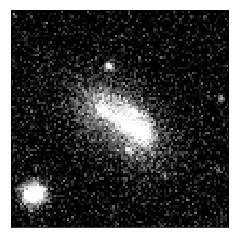

In [9]:
t = 13
n = bad[t]
print n

filename = SDSS_FITS_filename(gals[n]['run'],gals[n]['camcol'],gals[n]['field'], 'r')
print filename
print gals[n]['RA'], gals[n]['DEC']
img, hdr = open_fits(filename)

gal_position = SkyCoord(gals[n]['RA'], gals[n]['DEC'], unit='deg')
newra, newdec = 320.20488,0.046089203
gal_position = SkyCoord(newra,newdec, unit='deg')

cutout_size = int(40*gals[n]['petroR90_r']/0.396) # in pixels  
cutout = Cutout2D(img, gal_position, cutout_size, wcs=WCS(hdr))
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(cutout.data, origin='lower', interpolation='nearest',
          cmap='Greys_r', clim=get_clim(cutout.data))
ax.set_xticks([])
ax.set_yticks([])

In [10]:
chdr = adjust_cutout_hdr(cutout, hdr)

outfile = "{}_{}.fits".format(gals[n]['survey_id'], 'r')
save_cutout(cutout, chdr, outfile, **{'overwrite':True})

In [11]:
coords[t]['RA'] = newra
coords[t]['DEC'] = newdec

In [12]:
coords

RA,DEC
float64,float64
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0
